<a href="https://colab.research.google.com/github/nanipumpkin/Analise_Estatistica/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Upload do arquivo
from google.colab import files
arquivo = files.upload()

Saving tips.csv to tips (4).csv


In [3]:
# Atribuir variável de referência ao banco de dados
tips = pd.read_csv('tips.csv')

In [4]:
# Visualização das 5 primeiras linhas
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Quantidade de linhas e colunas
tips.shape

(244, 7)

In [6]:
# Verificar tipos de dados
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [7]:
# Estatísticas descritivas dos dados
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
# Qual a receita total das vendas do restaurante?
tips['total_bill'].sum()

4827.77

In [9]:
# Qual o total de gorjetas recebidas?
tips['tip'].sum()

731.5799999999999

In [10]:
# Total de gorjetas recebidas com arredondamento em 2 casas decimais
round(tips['tip'].sum(), 2)

731.58

In [11]:
# Qual o custo de uma refeição por pessoa?
tips['price_per_person'] = tips['total_bill'] / tips['size']

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [13]:
# Qual a porcentagem da conta equivale a gorjeta?
tips['bill_percentage'] = tips['tip'] / tips['total_bill']

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,bill_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,0.146808


In [15]:
# Média das gorjetas por sexo do garçom
tips.groupby('sex').mean()

,total_bill,tip,size,price_per_person,bill_percentage
sex,,,,,
Female,18.056897,2.833448,2.459770,7.463918,0.166491
Male,20.744076,3.089618,2.630573,8.123358,0.157651


In [16]:
# Média das gorjetas por tipo de refeição
tips.groupby('time').mean()

,total_bill,tip,size,price_per_person,bill_percentage
time,,,,,
Dinner,20.797159,3.102670,2.630682,8.109560,0.159518
Lunch,17.168676,2.728088,2.411765,7.315375,0.164128


In [17]:
# Média das gorjetas por dia da semana
tips.groupby('day').mean()

,total_bill,tip,size,price_per_person,bill_percentage
day,,,,,
Fri,17.151579,2.734737,2.105263,8.132851,0.169913
Sat,20.441379,2.993103,2.517241,8.187232,0.153152
Sun,21.410000,3.255132,2.842105,7.864024,0.166897
Thur,17.682742,2.771452,2.451613,7.423368,0.161276


In [18]:
# Verificar dados ausentes na base de dados
tips.isnull().sum()

total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
bill_percentage     0
dtype: int64

In [19]:
# Calcular receitas totais por dia de semana e sexo do garçom
tips.groupby(['day', 'sex'])['total_bill'].sum()

day   sex   
Fri   Female     127.31
      Male       198.57
Sat   Female     551.05
      Male      1227.35
Sun   Female     357.70
      Male      1269.46
Thur  Female     534.89
      Male       561.44
Name: total_bill, dtype: float64

In [20]:
# Resetar o index (permite salvar base em outro csv)
tips.groupby(['day', 'sex'])['total_bill'].sum().reset_index()

,day,sex,total_bill
0,Fri,Female,127.31
1,Fri,Male,198.57
2,Sat,Female,551.05
3,Sat,Male,1227.35
4,Sun,Female,357.70
5,Sun,Male,1269.46
6,Thur,Female,534.89
7,Thur,Male,561.44


Text(0, 0.5, 'Receita')

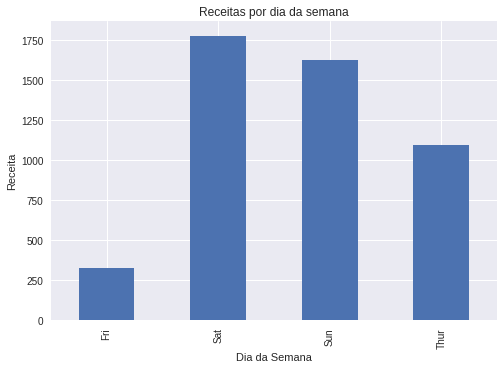

In [21]:
# Plotar gráfico de receitas por dia da semana e sexo
tips.groupby(['day'])['total_bill'].sum().plot.bar(title='Receitas por dia da semana')
plt.xlabel("Dia da Semana")
plt.ylabel("Receita")

In [22]:
tips.groupby(['day'])['total_bill'].sum()

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

Text(0, 0.5, 'Gorjeta')

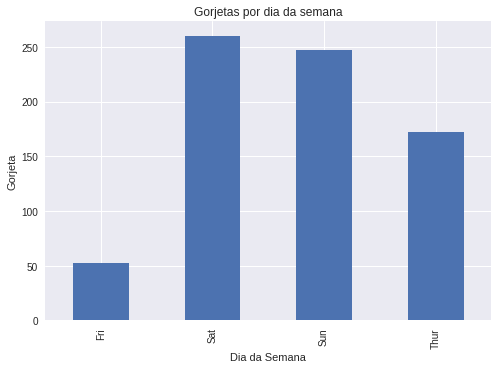

In [23]:
# Plotar gráfico de gorjetas por dia da semana
tips.groupby(['day'])['tip'].sum().plot.bar(title='Gorjetas por dia da semana')
plt.xlabel("Dia da Semana")
plt.ylabel("Gorjeta")

In [24]:
tips.groupby(['day'])['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

Text(0, 0.5, 'Receitas')

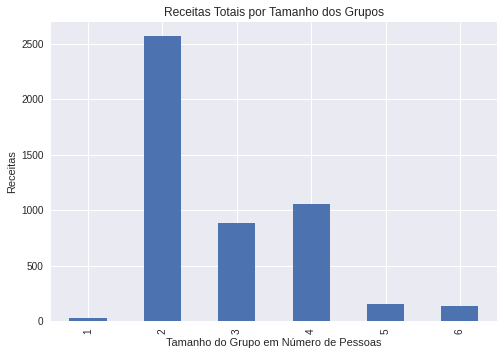

In [25]:
# Plotar gráfico de receitas por tamanho dos grupos
tips.groupby(['size'])['total_bill'].sum().plot.bar(title='Receitas Totais por Tamanho dos Grupos')
plt.xlabel("Tamanho do Grupo em Número de Pessoas")
plt.ylabel("Receitas")

Text(0, 0.5, 'Receitas')

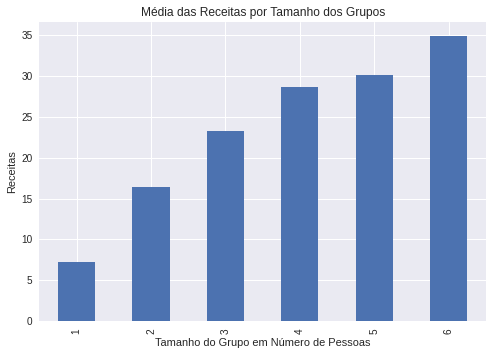

In [26]:
# Plotar médias de receitas por tamanho dos grupos
tips.groupby(['size'])['total_bill'].mean().plot.bar(title='Média das Receitas por Tamanho dos Grupos')
plt.xlabel("Tamanho do Grupo em Número de Pessoas")
plt.ylabel("Receitas")

In [27]:
tips.groupby(['size'])['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

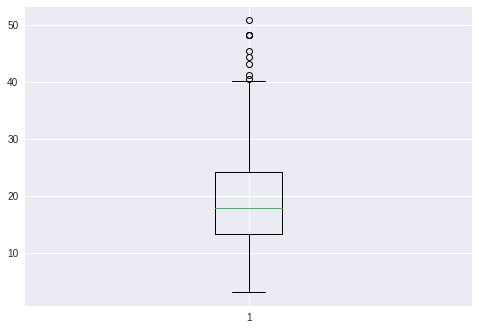

In [28]:
# Boxplot das receitas
plt.boxplot(tips['total_bill'])
plt.show()

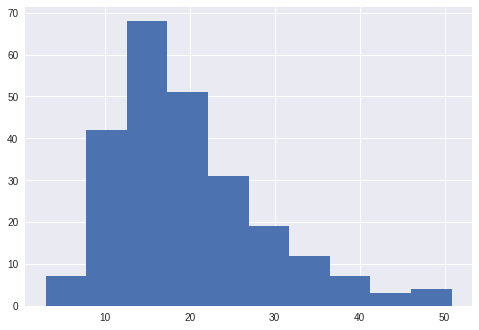

In [29]:
# Histograma das receitas
plt.hist(tips['total_bill'])
plt.show()

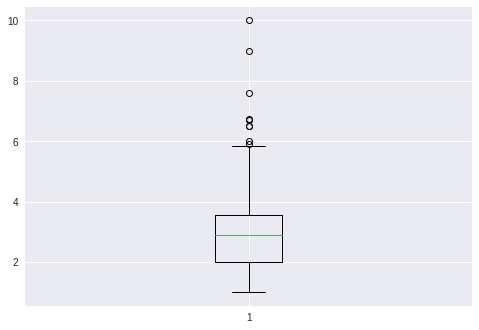

In [30]:
# Boxplot das gorjetas
plt.boxplot(tips['tip'])
plt.show()

In [31]:
# Menor gorjeta
tips['tip'].min()

1.0

In [32]:
# Maior gorjeta
tips['tip'].max()

10.0

In [33]:
# Identificar Outlier
tips[tips['tip'] == 10.0]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,bill_percentage
170,50.81,10.0,Male,Yes,Sat,Dinner,3,16.936667,0.196812


In [34]:
# Salvar base de dados
tips.to_csv('tips_new.csv', index=False)